#  Piso 1

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import pytz
%matplotlib inline

In [3]:
#df1 = pd.read_excel('/content/drive/MyDrive/Proyecto de Título -Localización y gestión de equipamiento médico/Proyecto/Codigo-HBQP/Conexión nodos-HBQP-piso-1.xlsx')
#df2 = pd.read_excel('/content/drive/MyDrive/Proyecto de Título -Localización y gestión de equipamiento médico/Proyecto/Codigo-HBQP/Conexión enlaces-HBQP-piso-1.xlsx')

In [4]:
df1 = pd.read_excel('Conexión nodos-HBQP-piso1.xlsx')
df2 = pd.read_excel('Conexión enlaces-HBQP-piso1.xlsx')
#df3 = pd.read_excel('01. Inventario HBQP_20.10.22.xlsx')

In [5]:
df1 = df1.replace(np.nan, '')

In [6]:
df2.head(5)

,Nodo1,Nodo2,Piso,Cor_tex x,Cor_tex y,rotacion
0,B-1-28,UCE-1,piso 1,11.0,18.0,0.0
1,B-1-11,UCE-2,piso 1,11.0,27.0,0.0
2,B-1-26,UCE-4,piso 1,11.0,50.0,0.0
3,B-1-29,UCE-5,piso 1,11.0,58.0,0.0
4,B-1-5,UCE-6,piso 1,11.0,80.0,0.0


In [7]:
# inicializamos el grafo
G = nx.Graph()

In [8]:
# asignamos nodos al grafo
for idx in range(df1.shape[0]):
    G.add_node(df1['Nodo'][idx], Planta=df1['Piso'][idx])

In [9]:
print(idx)

337


## Enlaces

In [10]:
# asignamos los enlaces al grafo
for idx in range(df2.shape[0]):
    for idx2 in range(df1.shape[0]):
        if df1['Nodo'][idx2] == df2['Nodo1'][idx]:
            var1 = np.array([df1['Distancia x'][idx2],df1['Distancia y'][idx2]])
    
        elif df1['Nodo'][idx2] == df2['Nodo2'][idx]:
            var2 = np.array([df1['Distancia x'][idx2],df1['Distancia y'][idx2]])

    distancia = np.sqrt(np.sum((var1-var2)**2))      
    G.add_edge(df2['Nodo1'][idx], df2['Nodo2'][idx], Planta=df2['Piso '][idx], distancia=distancia)

In [11]:
G.edges("B-1-28")

EdgeDataView([('B-1-28', 'UCE-1')])

## Generación de Red


In [12]:
# generamos el vector de posicion para estandarizar las coordenadas de la red
pos = []
for idx2 in range(df1.shape[0]):
    tupla_coor = (df1['Distancia x'][idx2],df1['Distancia y'][idx2])
    nombre = df1['Nodo'][idx2]
    pos.append([nombre,tupla_coor])
pos = dict(pos)
#pos

In [13]:
#Generamos  vector de posicion para los nombres
pos_t = []
for idx2 in range(338):
    tupla_coor_t = (df1['Cor_tex x'][idx2],df1['Cor_tex y'][idx2],df1['rotacion'][idx2])
    nombre = df1['Nodo'][idx2]
    pos_t.append([nombre,tupla_coor_t])
pos_t = dict(pos_t)
#print(pos_t)
pos_te = []
for idx2 in range(313,338):
    tupla_coor_te = (df1['Cor_tex x'][idx2],df1['Cor_tex y'][idx2],df1['rotacion'][idx2])
    nombre = df1['Nodo'][idx2]
    pos_te.append([nombre,tupla_coor_te])
pos_te = dict(pos_te)
print(pos_te)

{'ESC 1': (0.0, -22.0, 0), 'ESC 2': (197.0, -19.0, 0), 'ESC 3': (416.0, -23.0, 90), 'ESC 4': (603.0, -30.0, 90), 'ESC 5': (16.0, -210.0, 0), 'ESC 6': (462.0, -160.0, 0), 'ESC 7': (75.0, 134.0, 0), 'ESC 8': (119.0, 134.0, 0), 'ESC 9': (345.0, 190.0, 0), 'ESC 10': (392.0, 193.0, 90), 'ASC C-EQ 1': (55.0, -16.0, 0), 'ASC C-EQ 2': (227.0, 4.0, 90), 'ASC C-EQ 3': (463.0, -16.0, 0), 'ASC C-EQ 4': (300.0, -179.0, 90), 'ASC C-EQ 5': (33.0, 23.0, 0), 'ASC C-EQ 6': (265.0, 19.0, 0), 'ASC P 1': (33.0, -40.0, 90), 'ASC P 2': (195.0, -32.0, 0), 'ASC P 3': (448.0, -30.0, 0), 'ASC P 4': (310.0, -175.0, 90), 'ASC P 5': (433.0, -145.0, 0), 'ASC P 6': (34.0, 9.0, 0), 'ASC P 7': (315.0, 31.0, 0), 'ASC P 8': (410.0, 26.0, 0), 'ASC P 9': (410.0, 16.0, 0)}


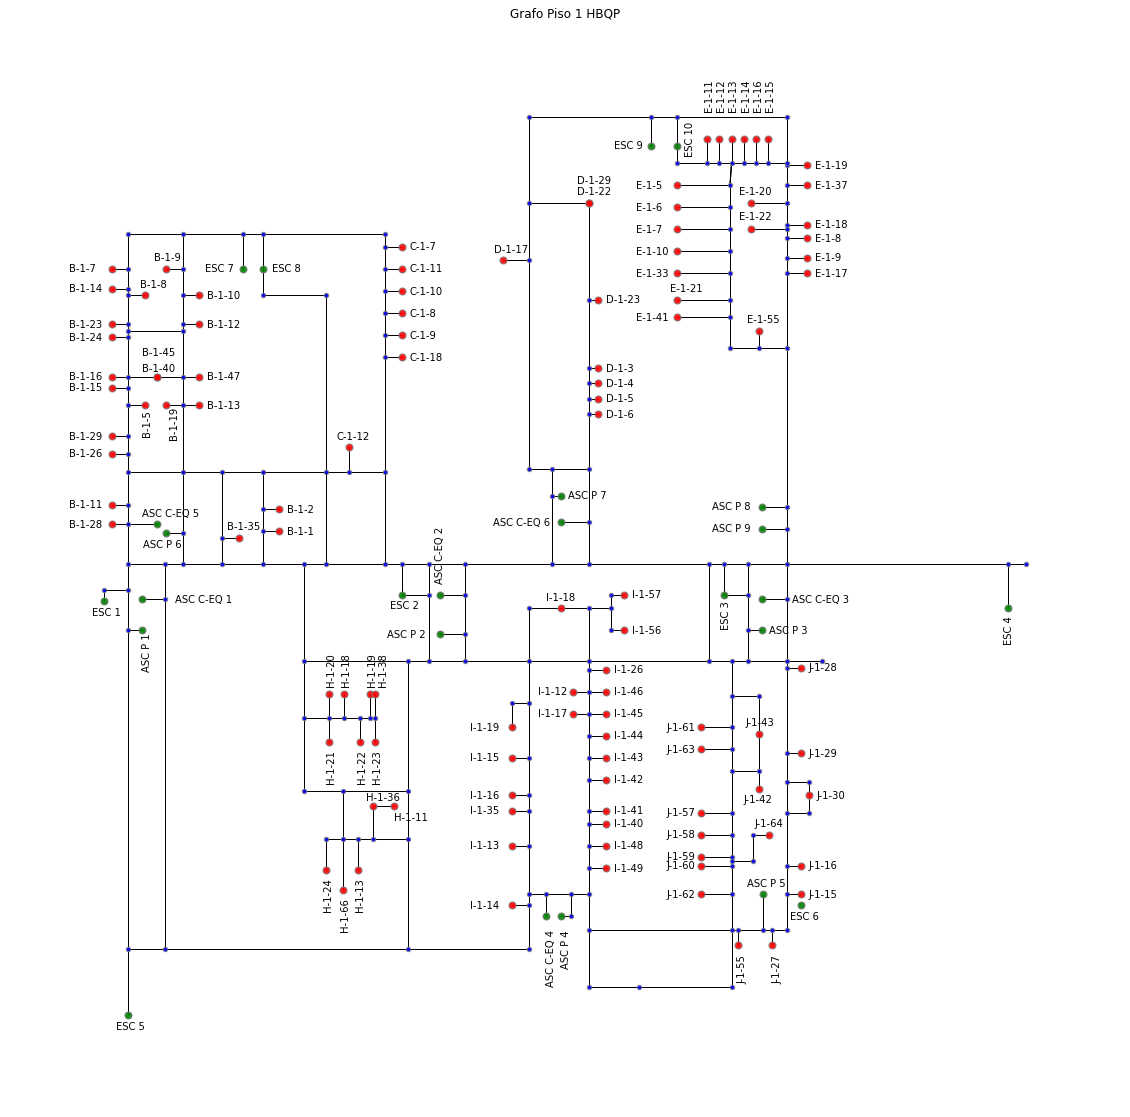

In [14]:
# generamos un data frame solo con los nodos para poder graficar
df_nodes = pd.DataFrame({'Nodos':G.nodes})
fig = plt.figure(figsize=(20,20))
plt.title('Grafo Piso 1 HBQP') 
# opciones que se repiten en todos los nodos
options = {"edgecolors": "tab:gray", "alpha": 0.9}
# mostramos todos los nodos de los pasillos
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[0:110]), node_color = "r",node_size=50, **options)
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[110:313]), node_color = "b",node_size=20, **options)
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[313:338]), node_color = "g",node_size=50, **options)
#for n in df_nodes['Nodos'].iloc[0:110]:
#  plt.text(pos[n][0],pos[n][1]+0.06,s=n,fontsize=8,horizontalalignment='center')
#for n in df_nodes['Nodos'].iloc[313:338]:
#  plt.text(pos[n][0],pos[n][1]+0.06,s=n,fontsize=8,horizontalalignment='center')
for n in df_nodes.Nodos.iloc[:110]:
    plt.text(pos_t[n][0],pos_t[n][1],s=n,fontsize=10,verticalalignment='center',rotation=pos_t[n][2])
for n in df_nodes.Nodos.iloc[313:338]:
    plt.text(pos_te[n][0],pos_te[n][1],s=n,fontsize=10,verticalalignment='center',rotation=pos_te[n][2])
plt.savefig("Grafo Piso 1 HBQP.png",dpi=300,bbox_inches='tight')
plt.show()

In [15]:
#df1

In [16]:
#df3.columns

In [17]:
#a = df1['Nodo']

In [18]:
#b = []
#c = []

In [19]:
#for i in a:
#    af = df3.where(df3['PMA de Almacenamiento']==i)
#    af = af[['PMA de Almacenamiento','Equipo']].dropna()
#    ce = af['Equipo'].value_counts(sort=False)
#    de = af['Equipo'].drop_duplicates()
#    gh = de.tolist()
#    jh = ce.tolist()
#    b.append(gh)
#    c.append(jh)

In [20]:
#df1.insert(6,"Equipos",b)

In [21]:
#df1.insert(7,"Cantidad de Equipos",c)

In [22]:
#df1

In [23]:
#df1.to_excel('Nodos.xlsx')